# Importing Libraries and Algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from joblib import dump, load
from scipy import special
np.random.seed(1234)

## Loading Dataset

In [2]:
df = pd.read_csv('dataset.csv')

## Removing duplicate columns from dataset

In [3]:
def remove_same_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

In [4]:
drop_col = remove_same_value_features(df)

In [5]:
new_df_columns = [e for e in df.columns if e not in drop_col]
new_df = df[new_df_columns]
new_df.count()

Bit2      6920
Bit3      6920
Bit4      6920
Bit7      6920
Bit11     6920
          ... 
Bit862    6920
Bit864    6920
Bit867    6920
Bit869    6920
Bit876    6920
Length: 622, dtype: int64

## Creating new .csv file without duplicate columns

In [6]:
new_df.to_csv("dataset_unique_columns.csv", index=False)
df2= pd.read_csv('dataset_unique_columns.csv')

## Determining columns having high correlation with each other

In [7]:
cor_matrix = df2.corr().abs()
cor_matrix.head()

,Bit2,Bit3,Bit4,Bit7,Bit11,Bit12,Bit13,Bit14,Bit15,Bit16,...,Bit837,Bit840,Bit841,Bit843,Bit861,Bit862,Bit864,Bit867,Bit869,Bit876
Bit2,1.000000,0.122590,0.022829,0.001228,0.288446,0.654227,0.223281,0.015555,0.052591,0.056526,...,0.002006,0.014466,0.022325,0.014629,0.003703,0.005173,0.014640,0.000501,0.001504,0.001877
Bit3,0.122590,1.000000,0.186223,0.006095,0.035361,0.093596,0.283534,0.126884,0.119492,0.101970,...,0.023124,0.114941,0.039635,0.116296,0.115777,0.042201,0.116386,0.004087,0.012269,0.015308
Bit4,0.022829,0.186223,1.000000,0.030476,0.006585,0.017430,0.102244,0.621675,0.060524,0.069443,...,0.009337,0.042850,0.048094,0.041885,0.034575,0.053960,0.044308,0.006585,0.008784,0.024662
Bit7,0.001228,0.006095,0.030476,1.000000,0.000354,0.000937,0.021720,0.010994,0.005275,0.016712,...,0.001418,0.069025,0.003761,0.068218,0.067641,0.003657,0.068165,0.000354,0.001063,0.001326
Bit11,0.288446,0.035361,0.006585,0.000354,1.000000,0.377801,0.064404,0.004487,0.002153,0.054243,...,0.000579,0.004173,0.001535,0.004220,0.004254,0.001492,0.004223,0.000145,0.000434,0.000541


In [8]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

C:\Users\asada\AppData\Local\Temp\ipykernel_13272\918335127.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,Bit2,Bit3,Bit4,Bit7,Bit11,Bit12,Bit13,Bit14,Bit15,Bit16,...,Bit837,Bit840,Bit841,Bit843,Bit861,Bit862,Bit864,Bit867,Bit869,Bit876
Bit2,NaN,0.12259,0.022829,0.001228,0.288446,0.654227,0.223281,0.015555,0.052591,0.056526,...,0.002006,0.014466,0.022325,0.014629,0.003703,0.005173,0.014640,0.000501,0.001504,0.001877
Bit3,NaN,NaN,0.186223,0.006095,0.035361,0.093596,0.283534,0.126884,0.119492,0.101970,...,0.023124,0.114941,0.039635,0.116296,0.115777,0.042201,0.116386,0.004087,0.012269,0.015308
Bit4,NaN,NaN,NaN,0.030476,0.006585,0.017430,0.102244,0.621675,0.060524,0.069443,...,0.009337,0.042850,0.048094,0.041885,0.034575,0.053960,0.044308,0.006585,0.008784,0.024662
Bit7,NaN,NaN,NaN,NaN,0.000354,0.000937,0.021720,0.010994,0.005275,0.016712,...,0.001418,0.069025,0.003761,0.068218,0.067641,0.003657,0.068165,0.000354,0.001063,0.001326
Bit11,NaN,NaN,NaN,NaN,NaN,0.377801,0.064404,0.004487,0.002153,0.054243,...,0.000579,0.004173,0.001535,0.004220,0.004254,0.001492,0.004223,0.000145,0.000434,0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bit862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.345821,0.096854,0.004479,0.005589
Bit864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034226,0.077091,0.128184
Bit867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000434,0.000541
Bit869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001625


## Removing columns with high correlation

In [9]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df2.drop(df2[to_drop], axis=1)

,Bit2,Bit3,Bit4,Bit7,Bit11,Bit12,Bit13,Bit14,Bit15,Bit16,...,Bit772,Bit773,Bit778,Bit783,Bit792,Bit822,Bit841,Bit867,Bit869,Bit876
0,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,1,0,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6916,1,0,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6917,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6918,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Creating new .csv file

In [10]:
new_df2 = df2.drop(df2[to_drop], axis=1)
new_df2.to_csv("dataset_unrelated_features.csv", index=False)



## Reading new Dataset and Labels

In [11]:
X = pd.read_csv('dataset_unrelated_features.csv')
y = pd.read_csv('label.csv')

In [12]:
print(y.value_counts())

Category
0           2537
1           2462
2           1921
dtype: int64


## Splitting the Data into Train, Validation & Test

In [13]:
X_train, X_pseudo_test, y_train, y_pseudo_test = train_test_split( X, y, train_size=0.8, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_pseudo_test, y_pseudo_test, test_size = 0.5,\
                                                stratify=y_pseudo_test, random_state=42) 

In [14]:
print (len(X_train), len(X_test), len(X_val))

5536 692 692


In [15]:
print(y_train.value_counts(), y_test.value_counts(), y_val.value_counts())

Category
0           2029
1           1970
2           1537
dtype: int64 Category
0           254
1           246
2           192
dtype: int64 Category
0           254
1           246
2           192
dtype: int64


## Implementing PCA

In [16]:
X_train['labels'] = 'Training_set'
X_test['labels'] = 'Test_set'
X_val['labels'] = 'Validation_set'

In [17]:
X = pd.concat([X_train, X_test, X_val],axis=0)

In [18]:
X['labels'].value_counts()

Training_set      5536
Test_set           692
Validation_set     692
Name: labels, dtype: int64

In [19]:
X_scaled = StandardScaler().fit_transform(X.iloc[:,:-1])

In [20]:
pca = PCA (n_components= 3)
principalComponents = pca.fit_transform(X_scaled)

In [21]:
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',  'principal component 3'])

In [22]:
principal_df.head()

,principal component 1,principal component 2,principal component 3
0,-6.324395,1.162851,-1.430456
1,-5.404943,-1.515546,-3.533579
2,-1.670122,-0.495078,1.101099
3,-2.418121,-2.007044,2.019142
4,-4.082405,-4.264301,1.382850


In [23]:
principal_df['labels'] = X['labels']
principal_df['labels'].value_counts()

Training_set      5536
Validation_set     692
Test_set           692
Name: labels, dtype: int64

In [24]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06642299 0.04457234 0.04025903]


## Plotting Train, Test & Validiation set

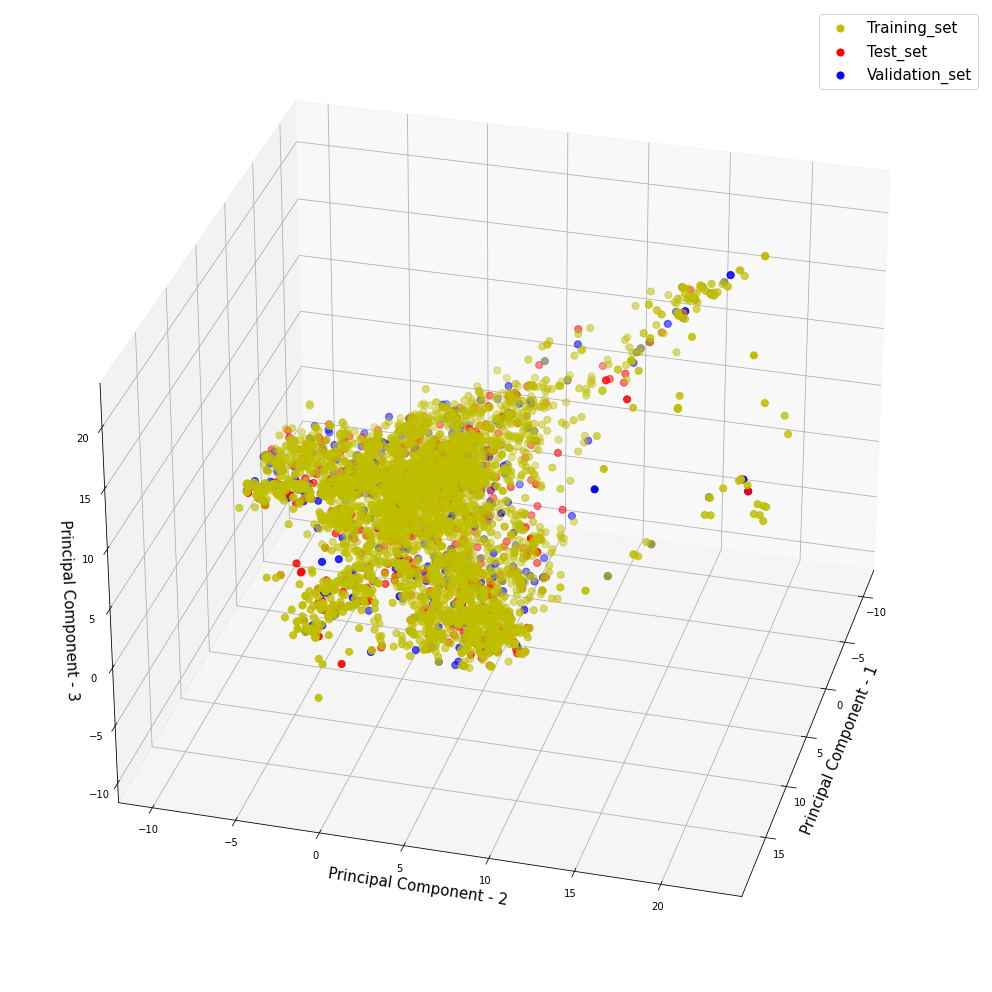

In [45]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (35,19)
ax = fig.add_subplot(111, projection = '3d')
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
ax.set_zlabel('Principal Component - 3',fontsize=15)
targets = ['Training_set', 'Test_set', 'Validation_set',]
colors = ['y', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = X['labels'] == target
    ax.scatter(principal_df.loc[indicesToKeep, 'principal component 1']
               , principal_df.loc[indicesToKeep, 'principal component 2'],
               principal_df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

ax.legend(targets,prop={'size': 15})
ax.view_init(30,15)

## Implementing different Algorithms & checking prediction scores

## 1) Bernoulli NB

In [26]:
clf1 = BernoulliNB()
clf1.fit(X_train.iloc[0:,:-1], y_train.values.ravel())

y_predict1 = clf1.predict(X_test.iloc[0:,:-1])
clf1.score(X_test.iloc[0:,:-1], y_test)

0.5187861271676301

## 2) Gaussian NB

## GridSearch CV

In [27]:
param = {'var_smoothing' : [0.15,0.015,0.0015,0.00015,0.000015,0.0000015]}
model_rs = GridSearchCV(estimator=GaussianNB(),param_grid=param, scoring = 'accuracy',n_jobs=4,cv=10,refit=True,return_train_score=True)
model_rs.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
y_pred = model_rs.predict(X_test.iloc[0:,:-1])
model_rs.score(X_test.iloc[0:,:-1], y_test)

0.5390173410404624

In [28]:
clf2 = GaussianNB(var_smoothing= 0.15)
clf2.fit(X_train.iloc[0:,:-1], y_train.values.ravel())

y_predict2 = clf2.predict(X_test.iloc[0:,:-1])
clf2.score(X_test.iloc[0:,:-1], y_test)

0.5390173410404624

## 3) Logistic Regression

## Identifying the value of the parameter C

In [29]:
for i in range(1,10):
    lr = LogisticRegression(C=i,multi_class='ovr', max_iter=500)
    lr.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    pred = lr.predict(X_test.iloc[0:,:-1])
    w = accuracy_score(pred, y_test)
    print(i, w)

D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

1 0.6734104046242775


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

2 0.6719653179190751


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

3 0.6763005780346821


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

4 0.6734104046242775


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

5 0.6719653179190751


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

6 0.6719653179190751


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

7 0.6690751445086706


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

8 0.6690751445086706


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

9 0.6719653179190751


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
for i in range(1,5):
    lr = LogisticRegression(C=i,multi_class='multinomial', max_iter=500)
    lr.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    pred = lr.predict(X_test.iloc[0:,:-1])
    w = accuracy_score(pred, y_test)
    print(i, w)

D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 0.661849710982659


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 0.6604046242774566


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 0.661849710982659
4 0.661849710982659


D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
clf3 = LogisticRegression(C=3, multi_class='ovr', max_iter=500 )
clf3.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
y_predict3= clf3.predict(X_test.iloc[0:,:-1])
clf3.score(X_test.iloc[0:,:-1], y_test)

D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Miscellenous\Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

0.6763005780346821

## 4) KNN

## Identifying the value of the parameter n_neighbours

In [32]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    pred = knn.predict(X_test.iloc[0:,:-1])
    w = accuracy_score(pred, y_test)
    print(i, w)

1 0.6575144508670521
2 0.653179190751445
3 0.6589595375722543
4 0.6878612716763006
5 0.680635838150289
6 0.6734104046242775
7 0.6734104046242775
8 0.661849710982659
9 0.6777456647398844
10 0.6705202312138728
11 0.661849710982659
12 0.661849710982659
13 0.6589595375722543
14 0.661849710982659


In [33]:
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski')
    knn.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    pred = knn.predict(X_test.iloc[0:,:-1])
    w = accuracy_score(pred, y_test)
    print(i, w)

1 0.6575144508670521
2 0.653179190751445
3 0.6589595375722543
4 0.6878612716763006
5 0.680635838150289
6 0.6734104046242775
7 0.6734104046242775
8 0.661849710982659
9 0.6777456647398844
10 0.6705202312138728


In [34]:
clf4 = KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean')
clf4.fit(X_train.iloc[0:,:-1], y_train.values.ravel())

y_predict4 = clf4.predict(X_test.iloc[0:,:-1])
clf4.score(X_test.iloc[0:,:-1], y_test)

0.6878612716763006

## 5) Random Forest Classifier

## Identifying the value of the parameters

In [35]:
for i in range(80,90):
    rfc = RandomForestClassifier(n_estimators= i, criterion="entropy", random_state= 42)
    rfc.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    y_pred = rfc.predict(X_test.iloc[0:,:-1])
    w = rfc.score(X_test.iloc[0:,:-1], y_test)
    print(i, w)

80 0.7008670520231214
81 0.6965317919075145
82 0.7008670520231214
83 0.6950867052023122
84 0.6979768786127167
85 0.6979768786127167
86 0.7023121387283237
87 0.6994219653179191
88 0.6979768786127167
89 0.6950867052023122


In [36]:
for i in range(1,10):
    rfc = RandomForestClassifier(n_estimators= i, criterion="gini", random_state= 42)
    rfc.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    y_pred = rfc.predict(X_test.iloc[0:,:-1])
    w = rfc.score(X_test.iloc[0:,:-1], y_test)
    print(i, w)

1 0.5924855491329479
2 0.6213872832369942
3 0.6416184971098265
4 0.6661849710982659
5 0.6632947976878613
6 0.6647398843930635
7 0.6647398843930635
8 0.6690751445086706
9 0.6690751445086706


In [37]:
clf5= RandomForestClassifier(n_estimators= 86, criterion="entropy", random_state= 42)  
clf5.fit(X_train.iloc[0:,:-1], y_train.values.ravel())

y_predict5 = clf5.predict(X_test.iloc[0:,:-1])
clf5.score(X_test.iloc[0:,:-1], y_test)

0.7023121387283237

## 6) Support Vector Machines

## Identifying the value of the parameters

In [38]:
for i in range(1,10):
    svc = SVC(C=i, kernel='poly')
    svc.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    y_pred = svc.predict(X_test.iloc[0:,:-1])
    w = svc.score(X_test.iloc[0:,:-1], y_test)
    print(i, w)

1 0.6921965317919075
2 0.6994219653179191
3 0.7124277456647399
4 0.7124277456647399
5 0.7167630057803468
6 0.703757225433526
7 0.6994219653179191
8 0.6936416184971098
9 0.7008670520231214


In [39]:
for i in range(1,10):
    svc = SVC(C=i, kernel='rbf')
    svc.fit(X_train.iloc[0:,:-1], y_train.values.ravel())
    y_pred = svc.predict(X_test.iloc[0:,:-1])
    w = svc.score(X_test.iloc[0:,:-1], y_test)
    print(i, w)

1 0.6719653179190751
2 0.6994219653179191
3 0.703757225433526
4 0.703757225433526
5 0.7153179190751445
6 0.7167630057803468
7 0.7196531791907514
8 0.7225433526011561
9 0.7182080924855492


In [40]:
clf6 = SVC(C=5, kernel='rbf') 
clf6.fit(X_train.iloc[0:,:-1], y_train.values.ravel())

y_predict6= clf6.predict(X_test.iloc[0:,:-1])
clf6.score(X_test.iloc[0:,:-1], y_test)

0.7153179190751445

## Calculating scores and other metrics

In [41]:
cm = confusion_matrix(y_test, y_predict6)
cm = pd.DataFrame(cm)
cm

,0,1,2
0,201,15,38
1,14,198,34
2,50,46,96


In [42]:
for i in range (cm.shape[0]):
    TP = cm.iloc[i,i]
    FP = cm.iloc[i,:].sum()- TP
    FN = cm.iloc[:,i].sum() - TP
    TN = cm.sum().sum() - TP-FP-FN
    Accuracy = (TP + TN)/cm.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = (2*precision*recall)/(precision+recall)
    print (cm.index[i], Accuracy, precision, recall, f1)

0 0.8309248554913294 0.7913385826771654 0.7584905660377359 0.7745664739884395
1 0.8424855491329479 0.8048780487804879 0.7644787644787645 0.7841584158415842
2 0.7572254335260116 0.5 0.5714285714285714 0.5333333333333333


In [43]:
f1_score(y_test, y_predict6, average= 'weighted')

0.711044587702447

## Launching the desired Model

In [44]:
dump(SVC(C=5.0, kernel='rbf') , 'Model.joblib')

['Model.joblib']